# Using CLI from Notebook

This example notebook is a supplement to the ANDES tutorial. Make sure you have read the tutorial on using the CLI first.

A brief version can be found at https://github.com/cuihantao/andes/blob/master/README.md#run-simulations

## The `!` magic in iPython

This example shows how to use the ANDES CLI from Jupyter Notebook.

It is based on the iPython magic `!`.
To run a command _from within_ IPython or Jupyter, place a `!` immediately before the command.

Conversely, all commands demonstrated in this notebook can be used in a terminal/shell by removing the preceeding `!` sign.

## Set up on Windows

Windows users will need to install [MSYS2](https://www.msys2.org/) to support most of the Linux shell commands.

To install MSYS2-base, uncomment the following line and run it:

In [1]:
# !conda install -c msys2 -n base --yes m2-base

## Running Shell Commands

For example, to list the directory , use `!ls`. This is equivalent to executing `ls` from the terminal.

In [2]:
!ls

'10. load-frequency-control.ipynb'  '6. using-cli-from-notebook.ipynb'
'1. simulate_and_plot.ipynb'	    '7. parallel-simulation.ipynb'
'2. inspect_data.ipynb'		    '8. change-setpoints.ipynb'
'3. eigenvalue.ipynb'		    '9. batch-processing.ipynb'
'4. inspect_models.ipynb'	     demonstration
'5. profiling.ipynb'		     verification


Likewise, to run `andes`, use `!andes`. Addition arguments can be passed as usual.

In [3]:
!andes


    _           _         | Version 1.5.7.post27.dev0+g9e0e253e
   /_\  _ _  __| |___ ___ | Python 3.9.7 on Linux, 12/14/2021 02:51:25 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

usage: andes [-h] [-v {1,10,20,30,40}] [--version]
             {run,plot,doc,misc,prepare,prep,selftest,st,demo} ...

positional arguments:
  {run,plot,doc,misc,prepare,prep,selftest,st,demo}
                        [run] run simulation routine; [plot] plot results;
                        [doc] quick documentation; [misc] misc. functions;
                        [prepare] prepare the numerical code; [selftest] run
                        self test; [demo] show demos.

optional arguments:
  -h, --help            show this help message and exit
  -v {1,10,20,30,40}, --verbose {1,10,20,30,40}
                        Verbosity level in 10-DEBUG, 20-INFO, 30-WARNING, or
                        40-ERROR.
  --version             show version info and

## Run a simulation

Pass the path to the case file and other arguments to andes from the command line as follows.

In [4]:
!andes run ../andes/cases/kundur/kundur_full.xlsx -r tds


    _           _         | Version 1.5.7.post27.dev0+g9e0e253e
   /_\  _ _  __| |___ ___ | Python 3.9.7 on Linux, 12/14/2021 02:51:26 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

Working directory: "/home/hacui/repos/andes/examples"
Loaded config from file "/home/hacui/.andes/andes.rc"
Loaded generated Python code in "/home/hacui/.andes/pycode".
Parsing input file "../andes/cases/kundur/kundur_full.xlsx"...
Input file parsed in 0.1907 seconds.
System internal structure set up in 0.0213 seconds.
-> System connectivity check results:
  No islanded bus detected.
  A total of 1 island(s) detected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.2783 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.608627841
2: |F(x)| = 3.371691245
3: |F(x)| = 3.38335788
4: |F(x)| = 1.643

Case file names can be separated from the path, which can be passed to `-p`. The above command is equivanent to

In [5]:
!andes run kundur_full.xlsx -p "../andes/cases/kundur/" -r tds


    _           _         | Version 1.5.7.post27.dev0+g9e0e253e
   /_\  _ _  __| |___ ___ | Python 3.9.7 on Linux, 12/14/2021 02:51:27 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

Working directory: "/home/hacui/repos/andes/examples"
Loaded config from file "/home/hacui/.andes/andes.rc"
Loaded generated Python code in "/home/hacui/.andes/pycode".
Parsing input file "../andes/cases/kundur/kundur_full.xlsx"...
Input file parsed in 0.1863 seconds.
System internal structure set up in 0.0211 seconds.
-> System connectivity check results:
  No islanded bus detected.
  A total of 1 island(s) detected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.2750 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.608627841
2: |F(x)| = 3.371691245
3: |F(x)| = 3.38335788
4: |F(x)| = 1.643

In [6]:
!pwd

/home/hacui/repos/andes/examples


In [7]:
import os

os.path.isfile('../andes/cases/kundur/kundur_full.xlsx')

True

### PSS/E RAW and DYR Files

To run a simulation using PSS/E raw and dyr files, pass the dyr file to argument `--addfile`. 

For example:

In [8]:
!andes run ../andes/cases/kundur/kundur.raw --addfile ../andes/cases/kundur/kundur_full.dyr -r tds


    _           _         | Version 1.5.7.post27.dev0+g9e0e253e
   /_\  _ _  __| |___ ___ | Python 3.9.7 on Linux, 12/14/2021 02:51:29 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

Working directory: "/home/hacui/repos/andes/examples"
Loaded config from file "/home/hacui/.andes/andes.rc"
Loaded generated Python code in "/home/hacui/.andes/pycode".
Parsing input file "../andes/cases/kundur/kundur.raw"...
  MODIFIED KUNDUR'S TWO-AREA TEST SYSTEM, DISTRIBUTED WITH ANDES
  SEE THE BOOK "POWER SYSTEM STABILITY AND CONTROL" FOR ORIGINAL DATA
Input file parsed in 0.0018 seconds.
Parsing additional file "../andes/cases/kundur/kundur_full.dyr"...
Addfile parsed in 0.1488 seconds.
System internal structure set up in 0.0219 seconds.
-> System connectivity check results:
  No islanded bus detected.
  A total of 1 island(s) detected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solve

## Check the output `lst` file

In [9]:
!cat kundur_full_out.lst

     0,                  Time [s],                            Time [s]
     1,            delta GENROU 1,                   $\delta$ GENROU 1
     2,            delta GENROU 2,                   $\delta$ GENROU 2
     3,            delta GENROU 3,                   $\delta$ GENROU 3
     4,            delta GENROU 4,                   $\delta$ GENROU 4
     5,            omega GENROU 1,                   $\omega$ GENROU 1
     6,            omega GENROU 2,                   $\omega$ GENROU 2
     7,            omega GENROU 3,                   $\omega$ GENROU 3
     8,            omega GENROU 4,                   $\omega$ GENROU 4
     9,              e1q GENROU 1,                     $e'_q$ GENROU 1
    10,              e1q GENROU 2,                     $e'_q$ GENROU 2
    11,              e1q GENROU 3,                     $e'_q$ GENROU 3
    12,              e1q GENROU 4,                     $e'_q$ GENROU 4
    13,              e1d GENROU 1,                     $e'_d$ GENROU 1
    14

## Plot and save to file

We found a limitation of using `andes plot` from within Notebook/iPython. The figure won't be displayed correctly. The workaround is to save the image as a file and display it from the notebook.

Please let us know if you have better solutions.

In [10]:
!andes plot kundur_full_out.lst 0 5 6 --save

Figure saved to "kundur_full_out_1.png".
Figure(640x480)


## Display image

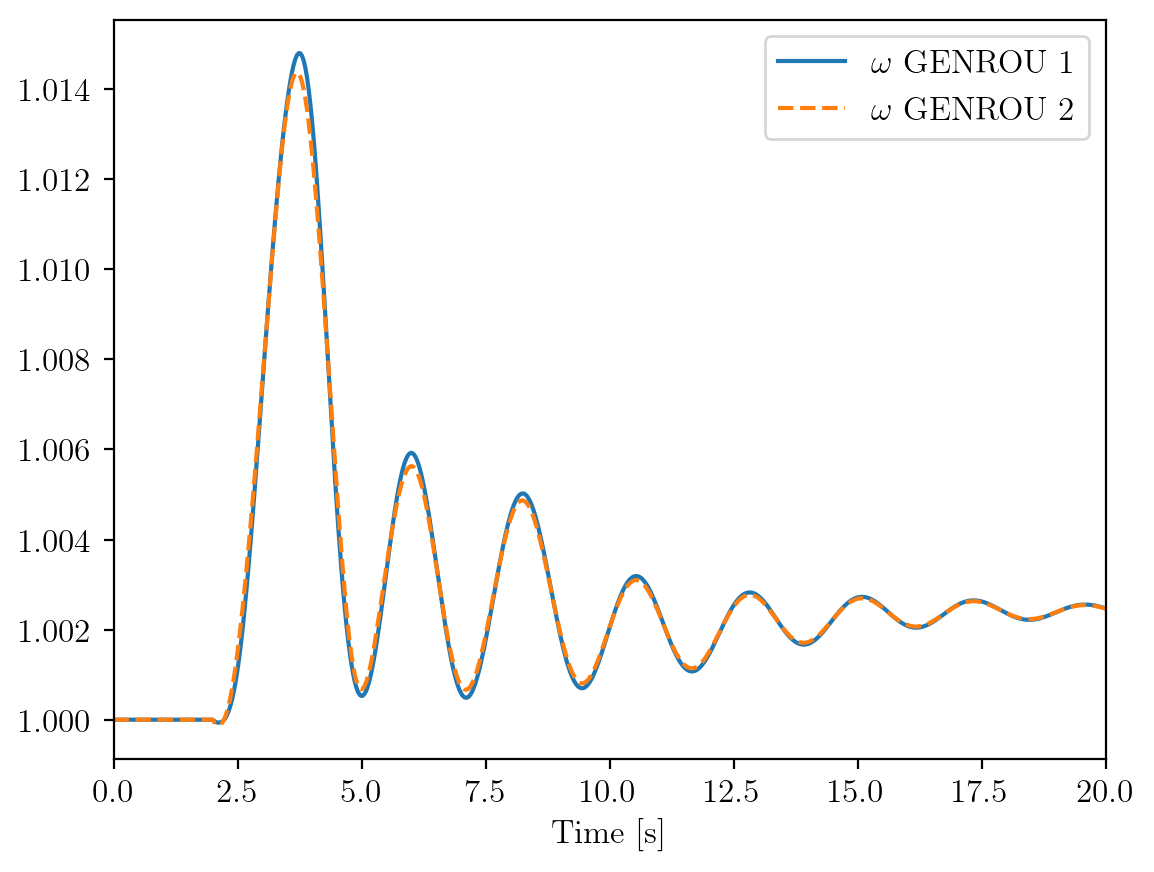

In [11]:
from IPython.display import Image
Image("kundur_full_out_1.png")

## Using `xargs` for index loop up

A convenient tool in Linux/macOS is `xargs`, which turns the standard output of one program into arguments for another.

`andes plot --xargs` accepts an input of search pattern for variable names and returns a list of arguments, including the matched indices, that can be understood by `andes plot`.


A convenient tool in Linux/macOS/Windows with MSYS2 is `xargs`, which turns the standard output of one program into arguments for another.

`andes plot --xargs` accepts an input of search pattern for variable names and returns a list of arguments, including the matched indices, that can be understood by `andes plot`.


## Using `xargs` for index lookup

A convenient tool in Linux/macOS is `xargs`, which turns the standard output of one program into arguments for another.

`andes plot --xargs` accepts an input of search pattern for variable names and returns a list of arguments, including the matched indices, that can be understood by `andes plot`.


To illustrate, let's look at an example output of `andes plot --xargs`.

In [12]:
!andes plot kundur_full_out.lst --xargs "omega GENROU"

kundur_full_out.lst 0 5 6 7 8


The output consists of the lst file name, the default x-axis index `0`, and the indices for the found variables. The full output can be passed to `andes plot` without modification.

We use the following command to pass the arguments:

In [13]:
!andes plot kundur_full_out.lst --xargs "omega GENROU" | xargs andes plot

Figure(640x480)


where `|` is the pipe operator in shell for piping the standard output of the left-hand side to the right-hand side, `xargs` captures the pipe-in and appends it to `andes plot`. 

The command is equivalent to manually running

In [14]:
!andes plot kundur_full_out.lst 5 6 7 8

Figure(640x480)


## Cleanup

Remove the saved `png` image files.

In [15]:
!rm -v *.png

removed 'kundur_full_out_1.png'


In [16]:
!andes misc -C


    _           _         | Version 1.5.7.post27.dev0+g9e0e253e
   /_\  _ _  __| |___ ___ | Python 3.9.7 on Linux, 12/14/2021 02:51:35 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

"/home/hacui/repos/andes/examples/kundur_out.lst" removed.
"/home/hacui/repos/andes/examples/kundur_out.npz" removed.
"/home/hacui/repos/andes/examples/kundur_full_out.txt" removed.
"/home/hacui/repos/andes/examples/kundur_full_out.npz" removed.
"/home/hacui/repos/andes/examples/kundur_out.txt" removed.
"/home/hacui/repos/andes/examples/kundur_full_out.lst" removed.
